Se usan los datos de la carpeta Data_football_mix.

En main están las temporadas desde 93_94 hasta 23_24.

En la carpeta de cada temporada están los archivos divididos por liga.

D1: Bundesliga

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [81]:
#Carpeta Main
folder = 'Data/main'
#Carpeta de las temporadas
folder_seasons = []
for i in range(2004, 2024):
    folder_seasons.append(f'{str(i)[2:]}_{str(i+1)[2:]}')

In [82]:
#budesliga
bundesliga_seasons = []
budesliga_file = 'D1.csv'

#serie A
serie_a_seasons = []
serie_a_file = 'I1.csv'

#Ligue 1
ligue_1_seasons = []
ligue_1_file = 'F1.csv'

#La Liga
la_liga_seasons = []
la_liga_file = 'SP1.csv'

In [83]:

for season in folder_seasons:
    try:
        bundesliga_seasons.append(pd.read_csv(f'{folder}/{season}/{budesliga_file}', sep=',', encoding='Latin1'))
        serie_a_seasons.append(pd.read_csv(f'{folder}/{season}/{serie_a_file}', sep=',', encoding='Latin1'))
        ligue_1_seasons.append(pd.read_csv(f'{folder}/{season}/{ligue_1_file}', sep=',', encoding='Latin1'))
        la_liga_seasons.append(pd.read_csv(f'{folder}/{season}/{la_liga_file}', sep=',', encoding='Latin1'))
    except:
        print(f'error en la temporada {season}')

error en la temporada 04_05


In [84]:
#cada temporada es un dataframe
dfs_seasons_bundesliga = []
dfs_seasons_serie_a = []
dfs_seasons_ligue_1 = []
dfs_seasons_la_liga = []

for season in bundesliga_seasons:
    dfs_seasons_bundesliga.append(pd.DataFrame(season))

for season in serie_a_seasons:
    dfs_seasons_serie_a.append(pd.DataFrame(season))

for season in ligue_1_seasons:
    dfs_seasons_ligue_1.append(pd.DataFrame(season))

for season in la_liga_seasons:
    dfs_seasons_la_liga.append(pd.DataFrame(season))

#Nos importan las columnas Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR
dfs_seasons_bundesliga = [season[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']] for season in dfs_seasons_bundesliga]
dfs_seasons_serie_a = [season[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']] for season in dfs_seasons_serie_a]
dfs_seasons_ligue_1 = [season[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']] for season in dfs_seasons_ligue_1]
dfs_seasons_la_liga = [season[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']] for season in dfs_seasons_la_liga]

dfs_seasons_serie_a[0].head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,27/08/05,Fiorentina,Sampdoria,2,1,H
1,27/08/05,Livorno,Lecce,2,1,H
2,28/08/05,Ascoli,Milan,1,1,D
3,28/08/05,Inter,Treviso,3,0,H
4,28/08/05,Juventus,Chievo,1,0,H


### manejo de datos

Agregamos nuevas columnas

#### Bundesliga: 18 equipos

In [85]:
# agregar Wk a cada fila de cada temporada
# Cada equipo juega 34 partidos por temporada
leagues_18_teams = [dfs_seasons_bundesliga, dfs_seasons_ligue_1]
for league in leagues_18_teams:
    for i in range(len(league)):
        #cada vez que los 18 equipos juegan 1 partido, se aumenta el contador
        wk = 1
        counter = 1
        for j in range(len(league[i])):
            if counter == 10:
                counter = 1
                wk += 1
            league[i].loc[j, 'Wk'] = wk
            counter += 1

dfs_seasons_bundesliga[-1].head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Wk
0,18/08/2023,Werder Bremen,Bayern Munich,0,4,A,1.0
1,19/08/2023,Augsburg,M'gladbach,4,4,D,1.0
2,19/08/2023,Hoffenheim,Freiburg,1,2,A,1.0
3,19/08/2023,Leverkusen,RB Leipzig,3,2,H,1.0
4,19/08/2023,Stuttgart,Bochum,5,0,H,1.0


#### Resto de ligas: 20 equipos

In [86]:
leagues_20_teams = [dfs_seasons_serie_a, dfs_seasons_la_liga]

for league in leagues_20_teams:
    for i in range(len(league)):
        wk = 1
        counter = 1
        for j in range(len(league[i])):
            if counter == 11:
                counter = 1
                wk += 1
            league[i].loc[j, 'Wk'] = wk
            counter += 1

dfs_seasons_la_liga[-1].tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Wk
253,24/02/2024,Almeria,Ath Madrid,2,2,D,26.0
254,25/02/2024,Cadiz,Celta,2,2,D,26.0
255,25/02/2024,Betis,Ath Bilbao,3,1,H,26.0
256,25/02/2024,Las Palmas,Osasuna,1,1,D,26.0
257,25/02/2024,Real Madrid,Sevilla,1,0,H,26.0


In [87]:
#rename columns
#HomeTeam -> Team_home, AwayTeam -> Team_away, FTHG -> Goals_home, FTAG -> Goals_away, 
leagues = [dfs_seasons_la_liga, dfs_seasons_ligue_1, dfs_seasons_serie_a, dfs_seasons_bundesliga]
for league in leagues:
    for season in league:
        season.columns = ['Date', 'Team_home', 'Team_away', 'Goals_home', 'Goals_away', 'FTR', 'Wk']
        season.drop(columns={'FTR'}, inplace=True)

In [88]:
#reodernar columnas
dfs_seasons_la_liga = [season[['Wk', 'Date', 'Team_home', 'Team_away', 'Goals_home', 'Goals_away']] for season in dfs_seasons_la_liga]
dfs_seasons_ligue_1 = [season[['Wk', 'Date', 'Team_home', 'Team_away', 'Goals_home', 'Goals_away']] for season in dfs_seasons_ligue_1]
dfs_seasons_serie_a = [season[['Wk', 'Date', 'Team_home', 'Team_away', 'Goals_home', 'Goals_away']] for season in dfs_seasons_serie_a]
dfs_seasons_bundesliga = [season[['Wk', 'Date', 'Team_home', 'Team_away', 'Goals_home', 'Goals_away']] for season in dfs_seasons_bundesliga]

dfs_seasons_ligue_1[-1].head()

,Wk,Date,Team_home,Team_away,Goals_home,Goals_away
0,1.0,11/08/2023,Nice,Lille,1,1
1,1.0,12/08/2023,Marseille,Reims,2,1
2,1.0,12/08/2023,Paris SG,Lorient,0,0
3,1.0,13/08/2023,Brest,Lens,3,2
4,1.0,13/08/2023,Clermont,Monaco,2,4


In [89]:
leagues = [dfs_seasons_la_liga, dfs_seasons_ligue_1, dfs_seasons_serie_a, dfs_seasons_bundesliga]

In [90]:
def remove_suffix(item):
    return item.replace("_home", "").replace("_away", "")

column = [remove_suffix(item) for item in dfs_seasons_ligue_1[0].columns]
columnas = []
[columnas.append(x) for x in column if x not in columnas]
columnas.remove("Wk")
columnas.remove("Date")
columnas.remove("Team")
columnas[0] = "score_prom"
print(columnas)
print(len(columnas))

['score_prom']
1


In [91]:
columnas.append("wins")
columnas.append("ties")
columnas.append("losses")
columnas.append("total_goals")
columnas.append("total_goals_conceded")
columnas.append("points")
columnas.append("streak")
columnas.append("wins_in_last_5_matches")
columnas.append("ties_in_last_5_matches")
columnas.append("losses_in_last_5_matches")

In [92]:
tablas = []

for dfs_seasons in leagues:
    tablas_season = []
    for torneo, i in zip(dfs_seasons, range(len(dfs_seasons))):
        equipos = torneo["Team_home"].unique()
        equipos2 = torneo["Team_away"].unique()
        stats = columnas

        tabla = {}

        for equipo in equipos:

            tabla[equipo] = dict.fromkeys(stats, 0)
            tabla[equipo]["last_5_matches"] = list()

        tablas_season.append(tabla)
    tablas.append(tablas_season)
print(stats)
print(tablas[1])

['score_prom', 'wins', 'ties', 'losses', 'total_goals', 'total_goals_conceded', 'points', 'streak', 'wins_in_last_5_matches', 'ties_in_last_5_matches', 'losses_in_last_5_matches']
[{'Paris SG': {'score_prom': 0, 'wins': 0, 'ties': 0, 'losses': 0, 'total_goals': 0, 'total_goals_conceded': 0, 'points': 0, 'streak': 0, 'wins_in_last_5_matches': 0, 'ties_in_last_5_matches': 0, 'losses_in_last_5_matches': 0, 'last_5_matches': []}, 'Lille': {'score_prom': 0, 'wins': 0, 'ties': 0, 'losses': 0, 'total_goals': 0, 'total_goals_conceded': 0, 'points': 0, 'streak': 0, 'wins_in_last_5_matches': 0, 'ties_in_last_5_matches': 0, 'losses_in_last_5_matches': 0, 'last_5_matches': []}, 'Marseille': {'score_prom': 0, 'wins': 0, 'ties': 0, 'losses': 0, 'total_goals': 0, 'total_goals_conceded': 0, 'points': 0, 'streak': 0, 'wins_in_last_5_matches': 0, 'ties_in_last_5_matches': 0, 'losses_in_last_5_matches': 0, 'last_5_matches': []}, 'Nancy': {'score_prom': 0, 'wins': 0, 'ties': 0, 'losses': 0, 'total_goals':

In [93]:
new_stats = ["wins",
"ties",
"losses",
"total_goals",
"total_goals_conceded",
"points",
"streak",
"wins_in_last_5_matches",
"ties_in_last_5_matches",
"losses_in_last_5_matches"]
procesated_matches_columns = list(dfs_seasons_ligue_1[0].columns)
procesated_matches_columns.insert(6, "score_prom_away")
procesated_matches_columns.insert(6, "score_prom_home")

for stat in new_stats:
    procesated_matches_columns.append(f"{stat}_home")
    procesated_matches_columns.append(f"{stat}_away")

procesated_matches = pd.DataFrame(columns = procesated_matches_columns)

procesated_matches.head()

,Wk,Date,Team_home,Team_away,Goals_home,Goals_away,score_prom_home,score_prom_away,wins_home,wins_away,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away


In [94]:
dfs_seasons_ligue_1[0].columns

Index(['Wk', 'Date', 'Team_home', 'Team_away', 'Goals_home', 'Goals_away'], dtype='object')

In [95]:
contador = 0
for dfs_seasons in leagues:
    for torneo, i in zip(dfs_seasons, range(len(dfs_seasons))):
        torneo.sort_values(by='Wk', inplace=True)
        tabla = tablas[contador][i]
        for index in torneo.index:
        
            """Escribir info en el nuevo df de partidos con la información hasta el partido la cual esta almacenada en 'tabla'"""
            match = torneo.loc[index]

            team_home = match["Team_home"]
            team_away = match["Team_away"]

            stats_home = tabla[team_home]
            stats_away = tabla[team_away]

            fila = []
            fila.append(match["Wk"])
            fila.append(match["Date"])
            fila.append(team_home)
            fila.append(team_away)
            fila.append(match["Goals_home"])
            fila.append(match["Goals_away"])

            for stat in stats:
                fila.append(tabla[team_home][stat])
                fila.append(tabla[team_away][stat])

            procesated_matches.loc[len(procesated_matches)] = fila
            
            
            """ Actualizar la tabla con lo que realmente ocurrió en ese partido"""

            matches_played_home = tabla[team_home]["wins"] + tabla[team_home]["ties"] + tabla[team_home]["losses"]+1
            matches_played_away = tabla[team_away]["wins"] + tabla[team_away]["ties"] + tabla[team_away]["losses"]+1
            
            ## stats promediadas:
            for stat in stats[:stats.index("wins")]:
                if stat == "score_prom":
                    tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match["Goals_home"])/matches_played_home
                    tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match["Goals_away"])/matches_played_away

            ## stats acumuladas
            
            empate = False
            if match["Goals_home"] > match["Goals_away"]:

                #victorias / derrotas
                tabla[team_home]["wins"] += 1
                tabla[team_away]["losses"] += 1

                #goles a favor
                tabla[team_home]["total_goals"] += match["Goals_home"]
                tabla[team_away]["total_goals"] += match["Goals_away"]

                #goles en contra
                tabla[team_home]["total_goals_conceded"] += match["Goals_away"]
                tabla[team_away]["total_goals_conceded"] += match["Goals_home"]

                #puntos
                tabla[team_home]["points"] += 3

                # racha
                tabla[team_home]["streak"] += 1
                tabla[team_away]["streak"] = 0

                # ultimos 5 partidos
                if len(tabla[team_home]["last_5_matches"]) == 5:
                    tabla[team_home]["last_5_matches"].pop(0)
                if len(tabla[team_away]["last_5_matches"]) == 5:
                    tabla[team_away]["last_5_matches"].pop(0)

                tabla[team_home]["last_5_matches"].append("W")
                tabla[team_away]["last_5_matches"].append("L")


            elif match["Goals_home"] < match["Goals_away"]:

                #victorias / derrotas
                tabla[team_away]["wins"] += 1
                tabla[team_home]["losses"] += 1

                #goles a favor
                tabla[team_away]["total_goals"] += match["Goals_away"]
                tabla[team_home]["total_goals"] += match["Goals_home"]

                #goles en contra
                tabla[team_away]["total_goals_conceded"] += match["Goals_home"]
                tabla[team_home]["total_goals_conceded"] += match["Goals_away"]

                #puntos
                tabla[team_away]["points"] += 3

                # racha
                tabla[team_away]["streak"] += 1
                tabla[team_home]["streak"] = 0

                # ultimos 5 partidos
                if len(tabla[team_home]["last_5_matches"]) == 5:
                    tabla[team_home]["last_5_matches"].pop(0)
                if len(tabla[team_away]["last_5_matches"]) == 5:
                    tabla[team_away]["last_5_matches"].pop(0)

                tabla[team_away]["last_5_matches"].append("W")
                tabla[team_home]["last_5_matches"].append("L")

            else:
                #empate
                tabla[team_home]["ties"] += 1
                tabla[team_away]["ties"] += 1

                #goles a favor
                tabla[team_home]["total_goals"] += match["Goals_home"]
                tabla[team_away]["total_goals"] += match["Goals_away"]

                #goles en contra
                tabla[team_home]["total_goals_conceded"] += match["Goals_away"]
                tabla[team_away]["total_goals_conceded"] += match["Goals_home"]

                #puntos
                tabla[team_home]["points"] += 1
                tabla[team_away]["points"] += 1

                # racha
                tabla[team_away]["streak"] += 1
                tabla[team_home]["streak"] += 1

                # ultimos 5 partidos
                if len(tabla[team_home]["last_5_matches"]) == 5:
                    tabla[team_home]["last_5_matches"].pop(0)
                if len(tabla[team_away]["last_5_matches"]) == 5:
                    tabla[team_away]["last_5_matches"].pop(0)

                tabla[team_away]["last_5_matches"].append("T")
                tabla[team_home]["last_5_matches"].append("T")

            tabla[team_home]["wins_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("W")
            tabla[team_home]["ties_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("T")
            tabla[team_home]["losses_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("L")

            tabla[team_away]["wins_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("W")
            tabla[team_away]["ties_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("T")
            tabla[team_away]["losses_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("L")
    
    contador += 1

In [96]:
print(len(procesated_matches))
procesated_matches.tail(10)

27168


,Wk,Date,Team_home,Team_away,Goals_home,Goals_away,score_prom_home,score_prom_away,wins_home,wins_away,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
27158,22.0,17/02/2024,Hoffenheim,Union Berlin,0.0,1.0,1.809524,0.952381,7.0,6.0,...,27.0,21.0,3.0,1.0,0.0,2.0,4.0,1.0,1.0,2.0
27159,23.0,25/02/2024,Dortmund,Hoffenheim,2.0,3.0,2.000000,1.727273,11.0,7.0,...,41.0,27.0,8.0,0.0,3.0,0.0,2.0,3.0,0.0,2.0
27160,23.0,23/02/2024,Leverkusen,Mainz,2.0,1.0,2.590909,0.772727,18.0,2.0,...,58.0,15.0,22.0,1.0,4.0,1.0,1.0,1.0,0.0,3.0
27161,23.0,24/02/2024,M'gladbach,Bochum,5.0,2.0,1.636364,1.181818,5.0,5.0,...,22.0,25.0,0.0,3.0,0.0,1.0,2.0,3.0,3.0,1.0
27162,23.0,24/02/2024,Stuttgart,FC Koln,1.0,1.0,2.318182,0.681818,15.0,3.0,...,46.0,16.0,4.0,0.0,4.0,1.0,0.0,2.0,1.0,2.0
27163,23.0,24/02/2024,Union Berlin,Heidenheim,2.0,2.0,0.954545,1.409091,7.0,7.0,...,24.0,27.0,2.0,0.0,3.0,1.0,1.0,3.0,1.0,1.0
27164,23.0,24/02/2024,Werder Bremen,Darmstadt,1.0,1.0,1.409091,1.045455,8.0,2.0,...,29.0,12.0,1.0,0.0,4.0,0.0,0.0,2.0,1.0,3.0
27165,23.0,24/02/2024,Bayern Munich,RB Leipzig,2.0,1.0,2.772727,2.181818,16.0,12.0,...,50.0,40.0,0.0,3.0,2.0,2.0,0.0,1.0,3.0,2.0
27166,23.0,25/02/2024,Ein Frankfurt,Wolfsburg,2.0,2.0,1.545455,1.181818,8.0,6.0,...,33.0,24.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0
27167,23.0,25/02/2024,Augsburg,Freiburg,2.0,1.0,1.409091,1.318182,5.0,8.0,...,23.0,29.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0


# ML

In [97]:
matches = procesated_matches.copy()

In [98]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["Goals_home"] > match["Goals_away"]:
        results.append(1)
    elif match["Goals_home"] < match["Goals_away"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [99]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 7069 partidos, 26.019581861012956%
Resultado 1, hay: 12317 partidos, 45.33642520612485%
Resultado 2, hay: 7782 partidos, 28.64399293286219%


In [23]:
import random

# Obtener los índices de los partidos con result == 1
indices = matches[matches['result'] == 1].index

# Seleccionar aleatoriamente 4000 índices para eliminar
indices_eliminar = random.sample(list(indices), 4000)
# Eliminar los partidos correspondientes a los índices seleccionados
matches = matches.drop(indices_eliminar)

In [100]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 7069 partidos, 26.019581861012956%
Resultado 1, hay: 12317 partidos, 45.33642520612485%
Resultado 2, hay: 7782 partidos, 28.64399293286219%


In [101]:
matches['Date'] = pd.to_datetime(matches['Date'])

C:\Users\Diego\AppData\Local\Temp/ipykernel_18140/2925990639.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  matches['Date'] = pd.to_datetime(matches['Date'])


In [102]:
# Obtener la fecha límite
fecha_limite = pd.to_datetime('11/08/2023', format='%d/%m/%Y')

# Filtrar los partidos antes de la fecha límite
matches_train = matches[matches['Date'] < fecha_limite]

# Filtrar los partidos después de la fecha límite
matches_test = matches[matches['Date'] >= fecha_limite]

In [103]:
matches_train.shape, matches_test.shape

((26300, 29), (861, 29))

In [104]:
result_train = matches_train["result"]
result_test = matches_test["result"]
matches_train = matches_train.drop(columns = ["Team_home", "Team_away", "result", "Goals_home", "Goals_away", "Date", "Wk"])
matches_test = matches_test.drop(columns = ["Team_home", "Team_away", "result", "Goals_home", "Goals_away", "Date", "Wk"])

matches_train.tail(), matches_test.tail()

(       score_prom_home  score_prom_away  wins_home  wins_away  ties_home  \
 27072         2.583333         1.500000        9.0        3.0        0.0   
 27074         2.083333         2.076923        3.0        7.0        4.0   
 27075         0.923077         1.416667        1.0        5.0        7.0   
 27076         1.250000         0.750000        2.0        1.0        3.0   
 27077         2.416667         1.416667        7.0        3.0        2.0   
 
        ties_away  losses_home  losses_away  total_goals_home  \
 27072        2.0          3.0          7.0              31.0   
 27074        2.0          5.0          4.0              25.0   
 27075        1.0          5.0          6.0              12.0   
 27076        3.0          7.0          8.0              15.0   
 27077        2.0          3.0          7.0              29.0   
 
        total_goals_away  ...  points_home  points_away  streak_home  \
 27072              18.0  ...         27.0         11.0          2.0   


In [105]:
X = matches_train.to_numpy()
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = result_train

In [106]:
X_test = scaler.transform(matches_test.to_numpy())
y_test = result_test

In [107]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.50      0.88      0.64       361
           2       0.49      0.44      0.47       248

    accuracy                           0.50       861
   macro avg       0.33      0.44      0.37       861
weighted avg       0.35      0.50      0.40       861



c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


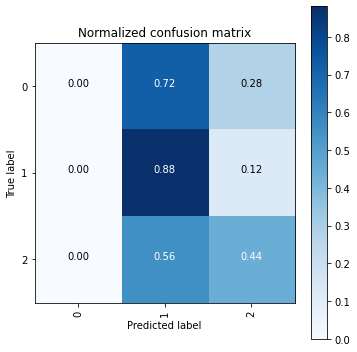

In [109]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y_train)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [110]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.47851335656213706
For kernel = poly, the accuracy is: 0.47038327526132406
For kernel = rbf, the accuracy is: 0.48664343786295006
For kernel = sigmoid, the accuracy is: 0.43205574912891986


In [35]:
from sklearn.svm import SVC

svm = SVC(kernel = "linear")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.36      0.02      0.03       252
           1       0.46      0.76      0.57       256
           2       0.46      0.60      0.52       248

    accuracy                           0.46       756
   macro avg       0.43      0.46      0.37       756
weighted avg       0.43      0.46      0.38       756



Normalized confusion matrix


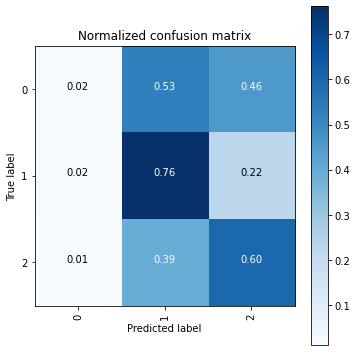

In [36]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.44841269841269843
For min_samples_split = 50 and t = 100 The accuracy is : 0.45634920634920634
For min_samples_split = 50 and t = 200 The accuracy is : 0.46164021164021163
For min_samples_split = 50 and t = 500 The accuracy is : 0.4656084656084656
For min_samples_split = 50 and t = 1000 The accuracy is : 0.458994708994709
For min_samples_split = 20 and t = 50 The accuracy is : 0.44047619047619047
For min_samples_split = 20 and t = 100 The accuracy is : 0.455026455026455
For min_samples_split = 20 and t = 200 The accuracy is : 0.455026455026455
For min_samples_split = 20 and t = 500 The accuracy is : 0.455026455026455
For min_samples_split = 20 and t = 1000 The accuracy is : 0.44576719576719576
For min_samples_split = 10 and t = 50 The accuracy is : 0.43915343915343913
For min_samples_split = 10 and t = 100 The accuracy is : 0.4523809523809524
For min_samples_split = 10 and t = 200 The accuracy is : 0.44576719576719576
For min_sa

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=50, n_estimators=500, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.41      0.17      0.24       252
           1       0.50      0.62      0.55       256
           2       0.45      0.61      0.52       248

    accuracy                           0.47       756
   macro avg       0.45      0.47      0.44       756
weighted avg       0.45      0.47      0.44       756



Normalized confusion matrix


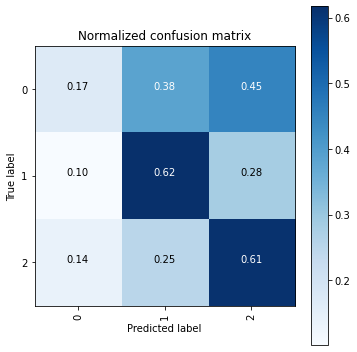

In [39]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.44841269841269843
For max_depth = 2 and t = 100 The accuracy is : 0.44576719576719576
For max_depth = 2 and t = 200 The accuracy is : 0.421957671957672
For max_depth = 2 and t = 500 The accuracy is : 0.4193121693121693
For max_depth = 2 and t = 1000 The accuracy is : 0.4193121693121693
For max_depth = 3 and t = 50 The accuracy is : 0.4497354497354497
For max_depth = 3 and t = 100 The accuracy is : 0.44576719576719576
For max_depth = 3 and t = 200 The accuracy is : 0.42328042328042326
For max_depth = 3 and t = 500 The accuracy is : 0.3915343915343915
For max_depth = 3 and t = 1000 The accuracy is : 0.4126984126984127
For max_depth = 4 and t = 50 The accuracy is : 0.43253968253968256
For max_depth = 4 and t = 100 The accuracy is : 0.41005291005291006
For max_depth = 4 and t = 200 The accuracy is : 0.42592592592592593
For max_depth = 4 and t = 500 The accuracy is : 0.3968253968253968
For max_depth = 4 and t = 1000 The accuracy is : 0.421957

In [41]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=0)

ada.fit(X_train, y_train)

predicted_ada = ada.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_ada))

Clasification report
              precision    recall  f1-score   support

           0       0.36      0.15      0.22       252
           1       0.48      0.59      0.53       256
           2       0.45      0.61      0.52       248

    accuracy                           0.45       756
   macro avg       0.43      0.45      0.42       756
weighted avg       0.43      0.45      0.42       756



Normalized confusion matrix


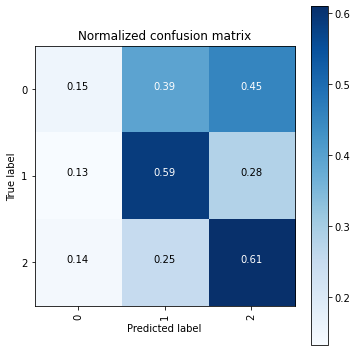

In [42]:
cnf_matrix = confusion_matrix(y_test, predicted_ada)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## GradientBoosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.4470899470899471
For max_depth = 2 and t = 100 The accuracy is : 0.455026455026455
For max_depth = 2 and t = 200 The accuracy is : 0.4669312169312169
For max_depth = 2 and t = 500 The accuracy is : 0.45634920634920634
For max_depth = 2 and t = 1000 The accuracy is : 0.4470899470899471
For max_depth = 3 and t = 50 The accuracy is : 0.46296296296296297
For max_depth = 3 and t = 100 The accuracy is : 0.47354497354497355
For max_depth = 3 and t = 200 The accuracy is : 0.4695767195767196
For max_depth = 3 and t = 500 The accuracy is : 0.4537037037037037
For max_depth = 3 and t = 1000 The accuracy is : 0.44576719576719576
For max_depth = 4 and t = 50 The accuracy is : 0.4537037037037037
For max_depth = 4 and t = 100 The accuracy is : 0.4642857142857143
For max_depth = 4 and t = 200 The accuracy is : 0.4497354497354497
For max_depth = 4 and t = 500 The accuracy is : 0.44047619047619047
For max_depth = 4 and t = 1000 The accuracy is : 0.43518518

In [45]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth =7, random_state=0)

gb.fit(X_train, y_train)

predicted_gb = gb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_gb))

Clasification report
              precision    recall  f1-score   support

           0       0.42      0.25      0.31       252
           1       0.52      0.61      0.56       256
           2       0.48      0.58      0.52       248

    accuracy                           0.48       756
   macro avg       0.47      0.48      0.47       756
weighted avg       0.47      0.48      0.47       756



Normalized confusion matrix


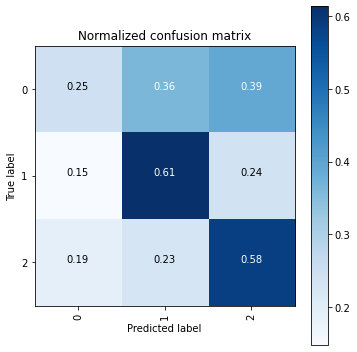

In [46]:
cnf_matrix = confusion_matrix(y_test, predicted_gb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## XGboost

In [47]:
from xgboost import XGBClassifier


range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

For max_depth = 2 and t = 50 The accuracy is : 0.45634920634920634
For max_depth = 2 and t = 100 The accuracy is : 0.4642857142857143
For max_depth = 2 and t = 200 The accuracy is : 0.4656084656084656
For max_depth = 2 and t = 500 The accuracy is : 0.458994708994709
For max_depth = 2 and t = 1000 The accuracy is : 0.458994708994709
For max_depth = 3 and t = 50 The accuracy is : 0.4722222222222222
For max_depth = 3 and t = 100 The accuracy is : 0.46825396825396826
For max_depth = 3 and t = 200 The accuracy is : 0.4537037037037037
For max_depth = 3 and t = 500 The accuracy is : 0.4417989417989418
For max_depth = 3 and t = 1000 The accuracy is : 0.4444444444444444
For max_depth = 4 and t = 50 The accuracy is : 0.4576719576719577
For max_depth = 4 and t = 100 The accuracy is : 0.44841269841269843
For max_depth = 4 and t = 200 The accuracy is : 0.44576719576719576
For max_depth = 4 and t = 500 The accuracy is : 0.4470899470899471
For max_depth = 4 and t = 1000 The accuracy is : 0.4298941798

In [48]:
xgb = XGBClassifier(max_depth = 6, n_estimators = 100)

xgb.fit(X_train, y_train)

predicted_xgb = xgb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_xgb))


Clasification report
              precision    recall  f1-score   support

           0       0.44      0.25      0.31       252
           1       0.50      0.59      0.54       256
           2       0.48      0.60      0.53       248

    accuracy                           0.48       756
   macro avg       0.47      0.48      0.46       756
weighted avg       0.47      0.48      0.46       756



Normalized confusion matrix


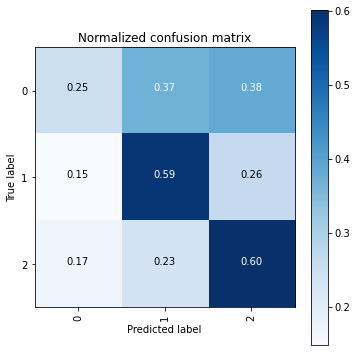

In [49]:
cnf_matrix = confusion_matrix(y_test, predicted_xgb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## MLP

In [74]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model

mlp = Sequential([
    Input(shape = X_train[0].shape[0]),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation= "relu"),
    Dense(3, activation = "softmax")
])

mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               2944      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 13379 (52.26 KB)
Trainable params: 13379 (52.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3) # Conjunto de validación = 0.8*0.25 = 0.2, este valor es estándar para validación

y_train2 = keras.utils.to_categorical(y_train2, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [76]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Ajusta la función de pérdida según el tipo de problema categorical es para multi clases
mlp.fit(X_train2, y_train2, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0528 - accuracy: 0.4393 - val_loss: 1.0502 - val_accuracy: 0.4456
Epoch 2/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0414 - accuracy: 0.4512 - val_loss: 1.0521 - val_accuracy: 0.4413
Epoch 3/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0388 - accuracy: 0.4573 - val_loss: 1.0473 - val_accuracy: 0.4468
Epoch 4/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0355 - accuracy: 0.4573 - val_loss: 1.0522 - val_accuracy: 0.4368
Epoch 5/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0348 - accuracy: 0.4590 - val_loss: 1.0510 - val_accuracy: 0.4357
Epoch 6/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0312 - accuracy: 0.4643 - val_loss: 1.0542 - val_accuracy: 0.4418
Epoch 7/50
526/526 [==============================] - 1s 1ms/step - loss: 1.0305 - accuracy: 0.4647 - val_loss: 1.0569 - val_accuracy: 0.4284
Epoch 

In [77]:
predicted_mlp = mlp.predict(X_test)
predicted_mlp = [np.argmax(x) for x in predicted_mlp]
y_test = [np.argmax(x) for x in y_test]

24/24 [==============================] - 0s 695us/step


In [78]:
print("Clasification report")
print(classification_report(y_test, predicted_mlp))

Clasification report
              precision    recall  f1-score   support

           0       0.36      0.26      0.30       252
           1       0.48      0.48      0.48       256
           2       0.44      0.56      0.50       248

    accuracy                           0.44       756
   macro avg       0.43      0.44      0.43       756
weighted avg       0.43      0.44      0.43       756



Normalized confusion matrix


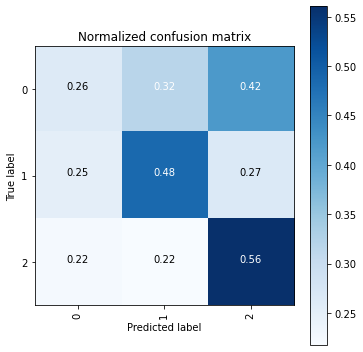

In [79]:
cnf_matrix = confusion_matrix(y_test, predicted_mlp)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()